In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

In [2]:
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

hdmi_in.configure(PIXEL_GRAY)
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

print(hdmi_in.mode)

VideoMode: width=1280 height=720 bpp=8


In [5]:
import cv2 as openCV
import time

iterations = 30

start = time.time()
for i in range(iterations):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    openCV.Sobel(inframe,-1,1,0,ksize=5,dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second using OpenCV:  " + str(iterations / (end - start)))

Frames per second using OpenCV:  9.422944517392542


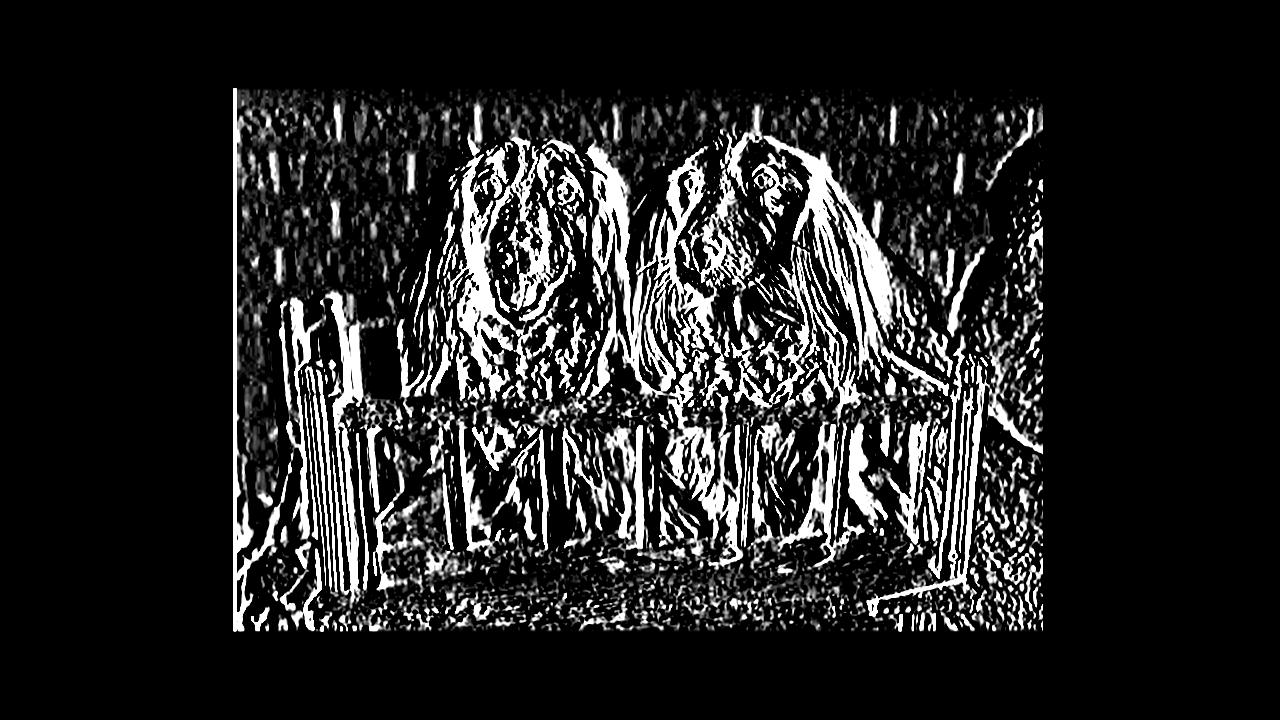

In [6]:
import PIL.Image

image = PIL.Image.fromarray(outframe)
image

In [7]:
iterations = 30

start = time.time()
for i in range(iterations):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    openCV.Laplacian(inframe,-1,ksize=5,dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second using OpenCV:  " + str(iterations / (end - start)))

Frames per second using OpenCV:  6.230087766473902


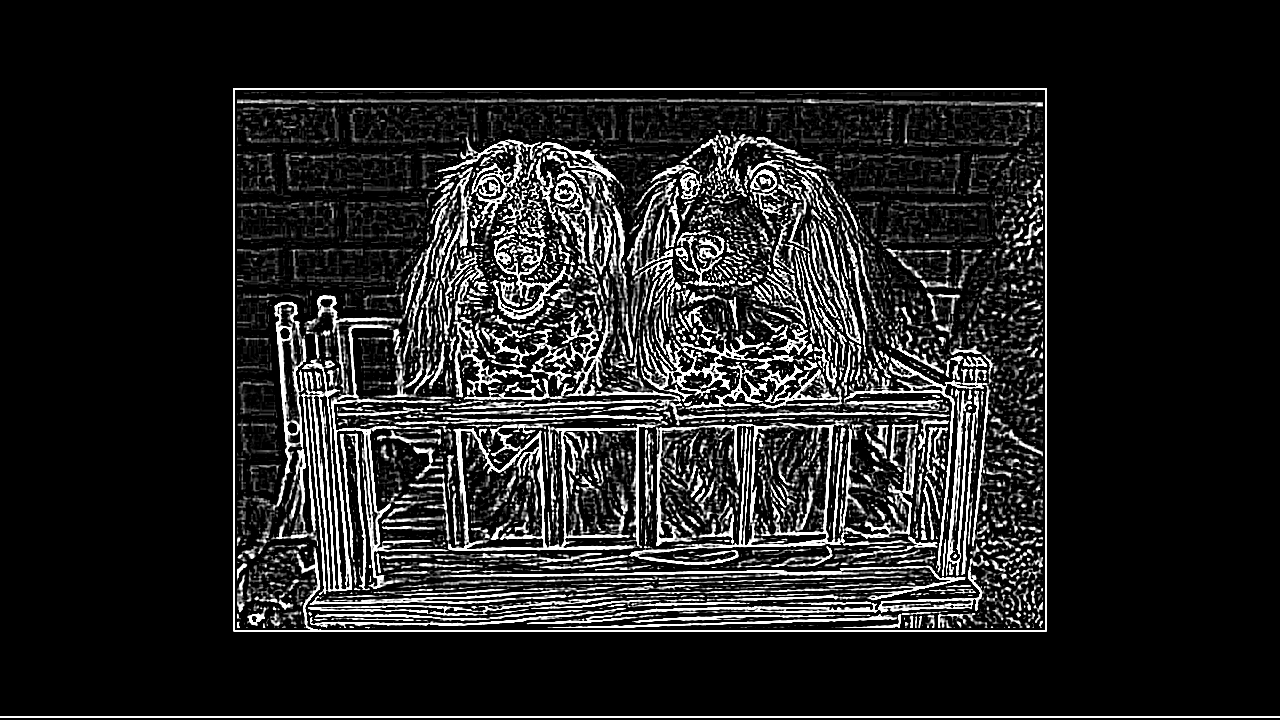

In [8]:
import PIL.Image

image = PIL.Image.fromarray(outframe)
image

In [9]:
hdmi_in.close()
hdmi_out.close()